In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy.optimize import curve_fit

# Step 1: Import Data

In [2]:
df = pd.read_csv("dataset3.csv")
df.set_index("time",inplace=True)
time = df.index
df.head()

,P1,P2,P3,P4
time,,,,
0,-0.005182,-0.009211,0.000434,0.000519
1,-0.002181,-0.004508,-0.000675,0.000564
2,0.007680,0.002626,-0.000795,0.002303
3,0.001324,0.003267,0.005924,0.000258
4,0.017934,0.019413,-0.003985,0.005780


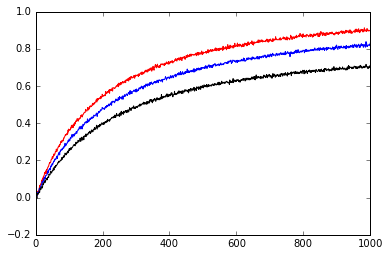

In [3]:
plt.plot(time, df.P1, "r")
plt.plot(time, df.P2, "b")
plt.plot(time, df.P3, "k")
plt.show()

# Step 2: Infer Starting Material Concentrations

In [4]:
def estimate_SM(index, initial_A_concentration, excess):
    P = df["P%d" % index]
    A = initial_A_concentration - P
    B = A + excess
    df["A%d" % index] = Series(A, index = time)
    df["B%d" % index] = Series(B, index = time)

estimate_SM(1, 1.0,  0.2)
estimate_SM(2, 1.0,  0.0)
estimate_SM(3, 1.0, -0.2)
estimate_SM(4, 0.8,  0.0)
df.head()

,P1,P2,P3,P4,A1,B1,A2,B2,A3,B3,A4,B4
time,,,,,,,,,,,,
0,-0.005182,-0.009211,0.000434,0.000519,1.005182,1.205182,1.009211,1.009211,0.999566,0.799566,0.799481,0.799481
1,-0.002181,-0.004508,-0.000675,0.000564,1.002181,1.202181,1.004508,1.004508,1.000675,0.800675,0.799436,0.799436
2,0.007680,0.002626,-0.000795,0.002303,0.992320,1.192320,0.997374,0.997374,1.000795,0.800795,0.797697,0.797697
3,0.001324,0.003267,0.005924,0.000258,0.998676,1.198676,0.996733,0.996733,0.994076,0.794076,0.799742,0.799742
4,0.017934,0.019413,-0.003985,0.005780,0.982066,1.182066,0.980587,0.980587,1.003985,0.803985,0.794220,0.794220


# Step 3: Compute Rate

In [5]:
polynomial_order = 15

def estimate_rate(index):
    concentration = df["P%d" % index]
    poly_coeff = np.polyfit(time, concentration, polynomial_order)
    polynomial = np.poly1d(poly_coeff)
    fitted_concentration = polynomial(time)
    derivative = np.polyder(polynomial)
    rate_vector = derivative(time)
    df["rate%d" % (i+1)]=Series(rate_vector, index=time)
    return rate_vector

for i in range(4):
    rate_vector = estimate_rate(i+1)
    
df.head()

,P1,P2,P3,P4,A1,B1,A2,B2,A3,B3,A4,B4,rate1,rate2,rate3,rate4
time,,,,,,,,,,,,,,,,
0,-0.005182,-0.009211,0.000434,0.000519,1.005182,1.205182,1.009211,1.009211,0.999566,0.799566,0.799481,0.799481,0.005671,0.004920,0.003605,0.002385
1,-0.002181,-0.004508,-0.000675,0.000564,1.002181,1.202181,1.004508,1.004508,1.000675,0.800675,0.799436,0.799436,0.005590,0.004842,0.003570,0.002411
2,0.007680,0.002626,-0.000795,0.002303,0.992320,1.192320,0.997374,0.997374,1.000795,0.800795,0.797697,0.797697,0.005513,0.004767,0.003536,0.002436
3,0.001324,0.003267,0.005924,0.000258,0.998676,1.198676,0.996733,0.996733,0.994076,0.794076,0.799742,0.799742,0.005438,0.004695,0.003502,0.002457
4,0.017934,0.019413,-0.003985,0.005780,0.982066,1.182066,0.980587,0.980587,1.003985,0.803985,0.794220,0.794220,0.005366,0.004626,0.003470,0.002477


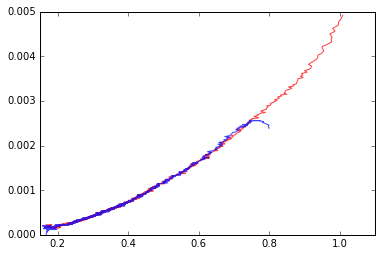

In [25]:
plt.plot(df.A2, df.rate2, "r", alpha=0.75)
plt.plot(df.A4, df.rate4, "b", alpha=0.75)
plt.xlim(0.15,1.1)
plt.ylim(0.0,0.005)
plt.show()

# Step 5: Different Excess Analysis

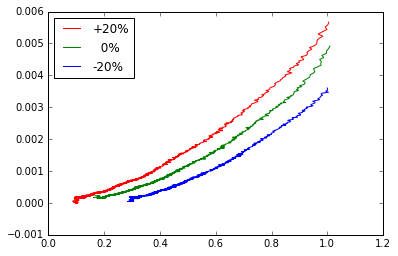

In [26]:
plt.plot(df.A1, df.rate1, "r", label="+20%")
plt.plot(df.A2, df.rate2, "g", label="  0%")
plt.plot(df.A3, df.rate3, "b", label="-20%")
plt.legend(loc="best")
plt.show()

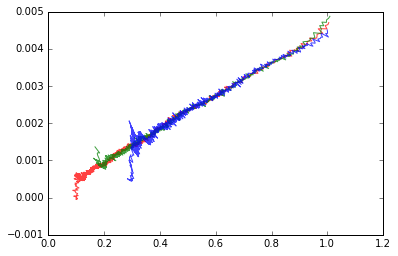

In [10]:
# rate / B vs A
plt.plot(df.A1,df.rate1/df.B1,"r", alpha=0.75)
plt.plot(df.A2,df.rate2/df.B2,"g", alpha=0.75)
plt.plot(df.A3,df.rate3/df.B3,"b", alpha=0.75)
plt.show()

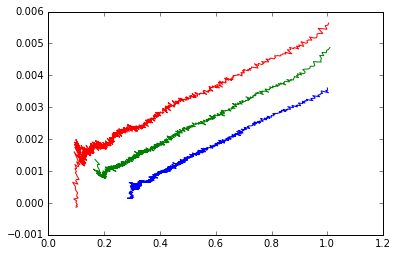

In [11]:
# rate / A vs A
plt.plot(df.A1,df.rate1/df.A1,"r")
plt.plot(df.A2,df.rate2/df.A2,"g")
plt.plot(df.A3,df.rate3/df.A3,"b")
plt.show()

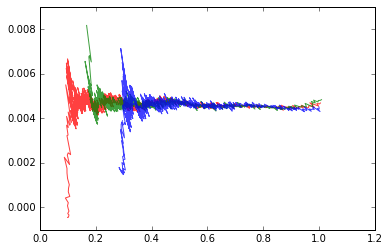

In [12]:
# rate / A*B vs A
plt.plot(df.A1,df.rate1/df.A1/df.B1,"r", alpha=0.75)
plt.plot(df.A2,df.rate2/df.A2/df.B2,"g", alpha=0.75)
plt.plot(df.A3,df.rate3/df.A3/df.B3,"b", alpha=0.75)
plt.show()

# Step 6: Three Parameter Fit

k_1      = 3.96 ± nan
k_minus1 = 162.78 ± nan
k_2      = 3.90 ± nan


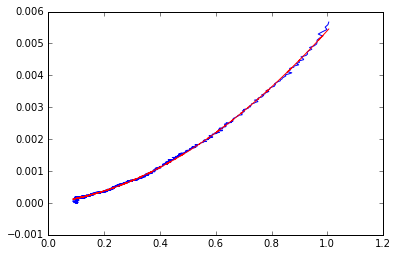

In [13]:
total_catalyst = 0.05

def make_rate_law(excess):
    def rate_law(A, k_1, k_minus1, k_2):
        B = A + excess
        numerator = k_1 * k_2 * A * B * total_catalyst
        denominator = k_minus1 + k_2*B + k_1*A
        return numerator / denominator
    return rate_law

rate_law = make_rate_law(0.20)
popt,pcov = curve_fit(rate_law, df.A1, df.rate1)
errors = np.sqrt(np.diag(pcov))
print "k_1      = %.2f ± %.2f" % (popt[0], errors[0])
print "k_minus1 = %.2f ± %.2f" % (popt[1], errors[1])
print "k_2      = %.2f ± %.2f" % (popt[2], errors[2])
fitted_rate = rate_law(df.A1, popt[0], popt[1], popt[2])
plt.plot(df.A1,df.rate1,"b")
plt.plot(df.A1,fitted_rate,"r")
plt.show()

# Step 7: Two Parameter Fit

K   = 0.05 ± 0.00
k_2 = 1.96 ± 0.16


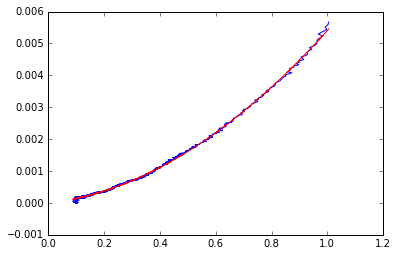

In [14]:
total_catalyst = 0.05

def make_rate_law(excess):
    def rate_law(A, K1, k2):
        B = A + excess
        numerator = K1 * k2 * A * B * total_catalyst
        denominator = 1 + K1 * A
        return numerator / denominator
    return rate_law

rate_law = make_rate_law(0.20)
popt,pcov = curve_fit(rate_law, df.A1, df.rate1)
errors = np.sqrt(np.diag(pcov))
print "K   = %.2f ± %.2f" % (popt[0], errors[0])
print "k_2 = %.2f ± %.2f" % (popt[1], errors[1])
fitted_rate = rate_law(df.A1, popt[0], popt[1])
plt.plot(df.A1,df.rate1,"b")
plt.plot(df.A1,fitted_rate,"r")
plt.show()

=== Run 1 ===
K   = 0.064 ± 0.004
k_2 = 1.479 ± 0.088


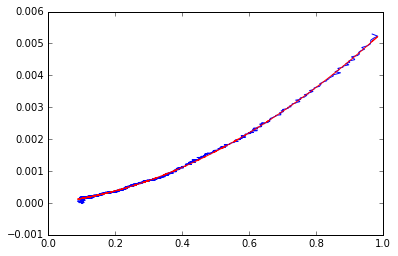

=== Run 2 ===
K   = 0.050 ± 0.004
k_2 = 1.902 ± 0.141


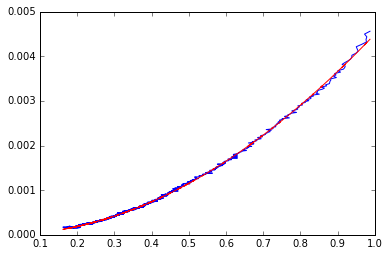

=== Run 3 ===
K   = 0.099 ± 0.006
k_2 = 0.980 ± 0.055


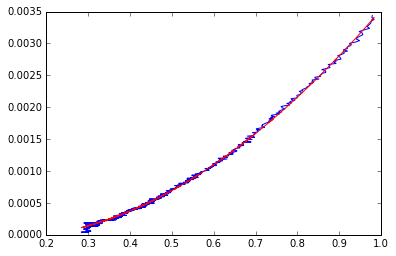

=== Run 4 ===
K   = 0.111 ± 0.009
k_2 = 0.876 ± 0.067


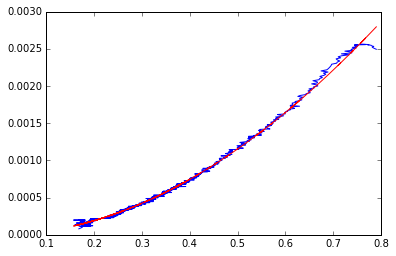

In [22]:
cutoff = 5

def fit_constants(index, excess):
    rate_law = make_rate_law(excess)
    x = np.array(df["A%d" % index])[cutoff:-cutoff]
    y = np.array(df["rate%d" % index])[cutoff:-cutoff]
    popt,pcov = curve_fit(rate_law, x, y)
    errors = np.sqrt(np.diag(pcov))
    print "=== Run %d ===" % index
    print "K   = %.3f ± %.3f" % (popt[0], errors[0])
    print "k_2 = %.3f ± %.3f" % (popt[1], errors[1])
    fitted_rate = rate_law(x, popt[0], popt[1])
    plt.plot(x, y, "b")
    plt.plot(x, fitted_rate, "r")
    plt.show()
    
fit_constants(1, 0.2)
fit_constants(2, 0.0)
fit_constants(3, -0.2)
fit_constants(4, 0.0)